<a href="https://colab.research.google.com/github/JittikanN/deepLearningHomework/blob/main/wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Wines Type and Quality Classification Exercises**

**Objective** 
*   To compare multiclass classification predictions on Wine quality (Low-Mid-High) using Machine Learning algorithms and Neural Network.

**Dataset** 
*   The dataset was downloaded from the UCI Machine Learning Repository. 
*   The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine and combined with randomly removed of few values. 
Vinho verde is a unique product from the Minho (northwest) region of Portugal. Medium in alcohol, is it particularly appreciated due to its freshness (specially in the summer). 
*   This dataset is public available for research purposes only, for more information, read [Cortez et al., 2009](http://www3.dsi.uminho.pt/pcortez/wine5.pdf).
*   Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available.(e.g. there is no data about grape types, wine brand, wine selling price, etc.).

**Attribute Information:**
*   Input variables (based on physicochemical tests):
> 1.  fixed acidity
> 2.  volatile acidity
> 3.  citric acid
> 4. residual sugar
> 5. chlorides
> 6. free sulfur dioxide
> 7. total sulfur dioxide
> 8. density
> 9. pH
> 10. sulphates
> 11. alcohol
*   Output variable (based on sensory data):
> 12. quality (score between 0 and 10)

**UCI Notes About the Dataset:**
*   The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones).
*   Outlier detection algorithms could be used to detect the few excellent or poor wines.
*   Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

**Dataset Acknowledgements:**
*   P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.



# 1. Importing Library & Import Data

In [1]:
##Import Library
#Data analysis
import numpy as np
import pandas as pd
import time
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


#Machine learning only sklearn for this rule
import sklearn.linear_model as lm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import RidgeClassifier, SGDClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRFClassifier
from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load Data
df_alldata = pd.read_csv('https://raw.githubusercontent.com/pakkardkaw/deepLearningHomework/main/winequalityN.csv')

df_alldata.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df_alldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
df_alldata.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [5]:
df_alldata.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [6]:
#Clean Data
#Missing Values Data Analysis

def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    return ms

#Check missing values
missingdata(df_alldata)

,Total,Percent
fixed acidity,10,0.153917
pH,9,0.138525
volatile acidity,8,0.123134
sulphates,4,0.061567
citric acid,3,0.046175
residual sugar,2,0.030783
chlorides,2,0.030783




*   There are null values in total 7 out of 11 input variables. All of null values percentage is less than 0.2%. 
*   With very small percentage, these null values can be dropped.



In [7]:
df_alldata=df_alldata.dropna(axis=0)
df_alldata.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
#Encode Catagorical data
df_alldata['type']=df_alldata['type'].map({ 'white':0,'red':1})

In [9]:
df_alldata.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# 2. Exploratory Data Analysis (EDA)

Wine Type
white: 0 75.35 % of the dataset
red: 1 24.65 % of the dataset


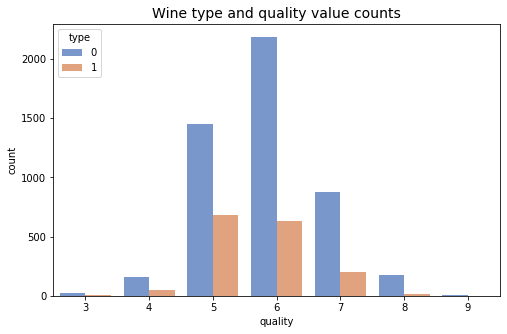

In [10]:
#Percentage of wine types in dataset
print('Wine Type')
print('white: 0', round(df_alldata['type'].value_counts()[0]/len(df_alldata) * 100,2), '% of the dataset')
print('red: 1', round(df_alldata['type'].value_counts()[1]/len(df_alldata) * 100,2), '% of the dataset')

#Wine quality and type distribution plot - Check if data is imbalanced or not
plt.figure(figsize=(8,5))
ax = sns.countplot(x = 'quality', hue = 'type', data = df_alldata, palette='muted', alpha=0.8)
plt.title('Wine type and quality value counts', fontsize = 14)
plt.show()


*   Distribution plot of wine quality by their types above confirms the imbalanceness in both wine type and quality, especially the cases that the wine quality > 7.

In [11]:
##Create the quality label based on the quality score (Low: <=5, Medium: 6-7, High: >7)
df_alldata['quality'] = df_alldata.quality.apply(lambda q: 0 if q <= 5 else 1 if q < 7 else 2)
df_alldata.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


Wine Quality Group
Low: 0 36.7 % of the dataset
Medium: 1 43.63 % of the dataset
High: 2 19.67 % of the dataset


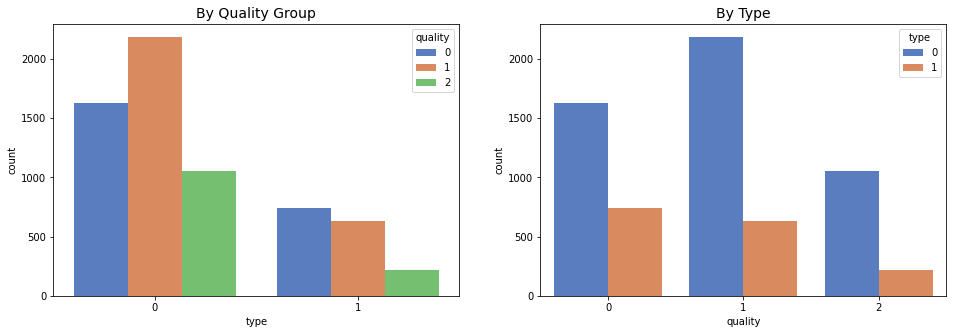

In [12]:
#Percentage of wine quality labels in dataset
print('Wine Quality Group')
print('Low: 0', round(df_alldata['quality'].value_counts()[0]/len(df_alldata) * 100,2), '% of the dataset')
print('Medium: 1', round(df_alldata['quality'].value_counts()[1]/len(df_alldata) * 100,2), '% of the dataset')
print('High: 2', round(df_alldata['quality'].value_counts()[2]/len(df_alldata) * 100,2), '% of the dataset')

f, axes = plt.subplots(ncols=2,figsize=(16,5))
sns.countplot(x = 'type', hue = 'quality', data = df_alldata, palette='muted', ax=axes[0])
axes[0].set_title('By Quality Group', fontsize = 14)
ax2 = sns.countplot(x = 'quality', hue = 'type', data = df_alldata, palette='muted', ax=axes[1])
axes[1].set_title('By Type', fontsize = 14)
plt.show()



*   After grouping wine qualities into 3 groups (Low (<=5), Medium (6-7), High (>7)), dataset is still imbalance. We will oversampling the dataset by wine quality group prior to ML and NN.



In [13]:
#Check distribution of features data grouped by quality values
#ax = df_alldata.groupby(['quality']).hist(bins=10, figsize=(18,20))
#plt.show()

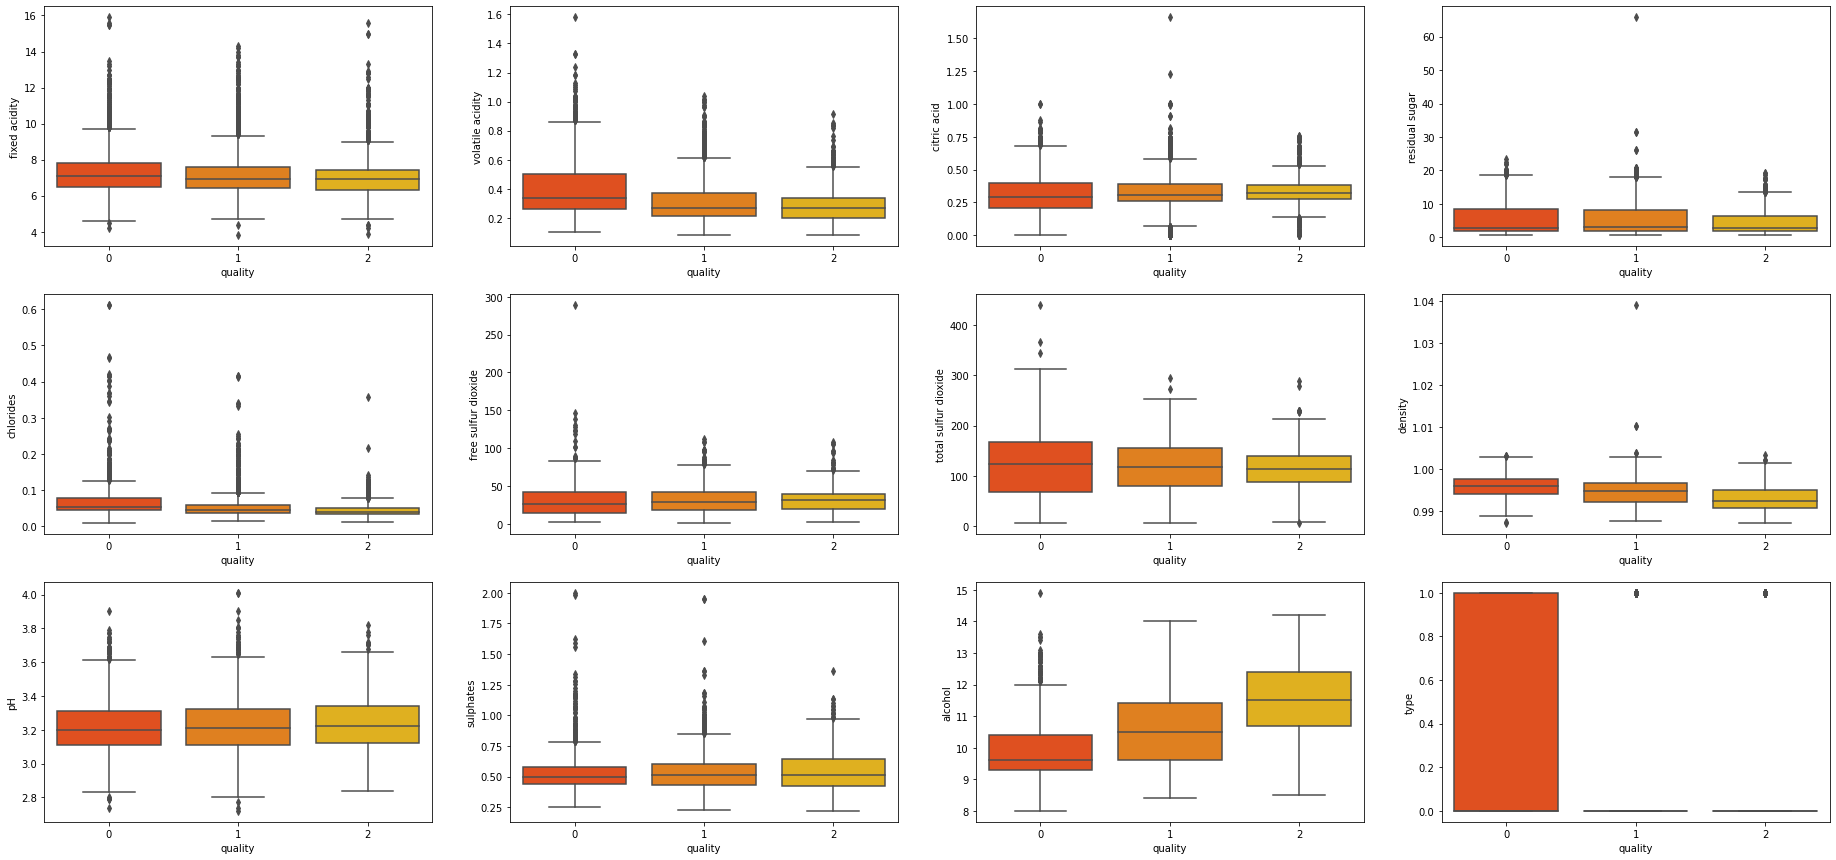

In [14]:
#Check outliers
f, axes = plt.subplots(ncols=4,nrows=3, figsize=(32,15))
data=df_alldata
sns.boxplot(x='quality', y='fixed acidity', data=data, palette='autumn', ax=axes[0,0])
sns.boxplot(x='quality', y='volatile acidity', data=data, palette='autumn', ax=axes[0,1])
sns.boxplot(x='quality', y='citric acid', data=data, palette='autumn', ax=axes[0,2])
sns.boxplot(x='quality', y='residual sugar', data=data, palette='autumn', ax=axes[0,3])

sns.boxplot(x='quality', y='chlorides', data=data, palette='autumn', ax=axes[1,0])
sns.boxplot(x='quality', y='free sulfur dioxide', data=data, palette='autumn', ax=axes[1,1])
sns.boxplot(x='quality', y='total sulfur dioxide', data=data, palette='autumn', ax=axes[1,2])
sns.boxplot(x='quality', y='density', data=data, palette='autumn', ax=axes[1,3])

sns.boxplot(x='quality', y='pH', data=data, palette='autumn', ax=axes[2,0])
sns.boxplot(x='quality', y='sulphates', data=data, palette='autumn', ax=axes[2,1])
sns.boxplot(x='quality', y='alcohol', data=data, palette='autumn', ax=axes[2,2])
sns.boxplot(x='quality', y='type', data=data, palette='autumn', ax=axes[2,3])

plt.show()



*   In these following three columns; Residual sugar, Free sulfur dioxide, and density, we can notice significant or extreme outliers. These extreme outliers should be removed.



In [15]:
#Remove Extreme Outliers
#Removing outliers in residual sugar
lower = df_alldata['residual sugar'].mean()-3*df_alldata['residual sugar'].std()
upper = df_alldata['residual sugar'].mean()+3*df_alldata['residual sugar'].std()
df_alldata = df_alldata[(df_alldata['residual sugar']>lower) & (df_alldata['residual sugar']<upper)]

#Removing outliers in free sulfur dioxide
lower = df_alldata['free sulfur dioxide'].mean()-3*df_alldata['free sulfur dioxide'].std()
upper = df_alldata['free sulfur dioxide'].mean()+3*df_alldata['free sulfur dioxide'].std()
df_alldata = df_alldata[(df_alldata['free sulfur dioxide']>lower) & (df_alldata['free sulfur dioxide']<upper)]

#Removing outliers in density
lower = df_alldata['density'].mean()-3*df_alldata['density'].std()
upper = df_alldata['density'].mean()+3*df_alldata['density'].std()
df_alldata = df_alldata[(df_alldata['density']>lower) & (df_alldata['density']<upper)]

df_alldata.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6399 entries, 1 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6399 non-null   int64  
 1   fixed acidity         6399 non-null   float64
 2   volatile acidity      6399 non-null   float64
 3   citric acid           6399 non-null   float64
 4   residual sugar        6399 non-null   float64
 5   chlorides             6399 non-null   float64
 6   free sulfur dioxide   6399 non-null   float64
 7   total sulfur dioxide  6399 non-null   float64
 8   density               6399 non-null   float64
 9   pH                    6399 non-null   float64
 10  sulphates             6399 non-null   float64
 11  alcohol               6399 non-null   float64
 12  quality               6399 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 699.9 KB


#2.1 Visualize dataset

In [16]:
for x_col in df_alldata.columns:
    fig = px.histogram(df_alldata, x=x_col, color="quality",title="x_col")
    fig.show()

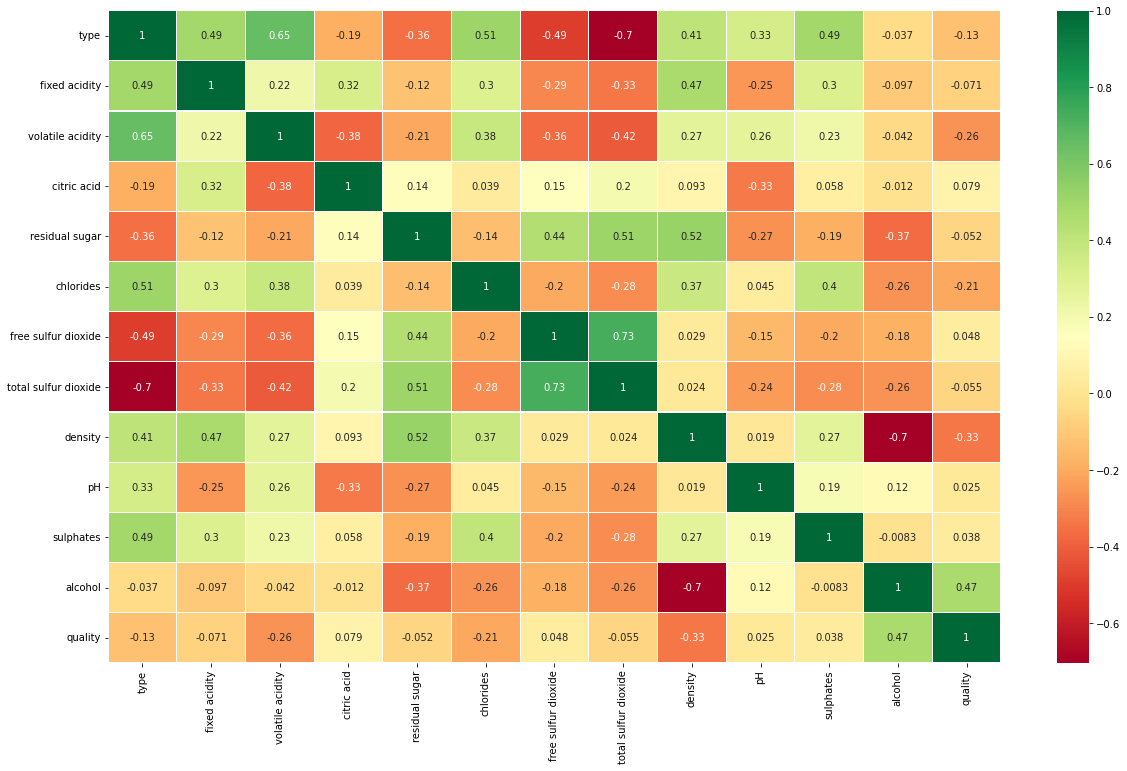

In [17]:
sns.heatmap(df_alldata.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

#3. Data Pre-processing

#3.1 Treating Imbalanced Dataset: Oversampling


*   As stated earlier that this wine quality group [0,1,2] data set is imbalanced, showing much less cases for high quality group [2]. 
*   The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting.
*   In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.
*   We will use random oversampling for this data set to prevent loss of information.


In [18]:
#Check value counts in wine quality group
low = df_alldata[df_alldata['quality']==0]
med = df_alldata[df_alldata['quality']==1]
high = df_alldata[df_alldata['quality']==2]
print(low.shape)
print(med.shape)
print(high.shape)

(2346, 13)
(2789, 13)
(1264, 13)


In [19]:
#Over-sampling
low_rand = low.sample(med.shape[0],replace = True)  # duplicates randomly *exit.shape[0] - stay.shape[0]* samples
high_rand = high.sample(med.shape[0],replace = True)

print(low_rand.shape)
print(med.shape)
print(high_rand.shape)

(2789, 13)
(2789, 13)
(2789, 13)


In [20]:
#New dataset 
df_alldata2 = pd.concat([low_rand,med,high_rand],axis =0)
df_alldata2['quality'].value_counts()

0    2789
1    2789
2    2789
Name: quality, dtype: int64

In [21]:
df_alldata2.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
5889,1,7.1,0.340,0.28,2.0,0.082,31.0,68.0,0.99694,3.45,0.48,9.4,0
4692,0,6.0,0.360,0.32,1.1,0.053,26.0,173.0,0.99414,3.38,0.54,8.8,0
4349,0,7.2,0.340,0.28,10.4,0.108,43.0,187.0,0.99738,2.96,0.57,9.4,0
5602,1,9.1,0.765,0.04,1.6,0.078,4.0,14.0,0.99800,3.29,0.54,9.7,0
643,0,6.4,0.240,0.28,11.5,0.050,34.0,163.0,0.99690,3.31,0.45,9.5,0


#3.2 Splitting the Dataset into training and validate datasets

In [22]:
#Split Train Test Data
from sklearn.model_selection import train_test_split
x_all=df_alldata2
y_all=df_alldata2[['quality']]

x_train, x_test, y_train, y_test = train_test_split(x_all, y_all,test_size=0.2,stratify=y_all,random_state=1)


#Explore Train & Test

for x_col in x_train.columns:
    fig = px.histogram(x_train, x=x_col, color="quality",title="Train")
    fig.show()
    fig = px.histogram(x_test, x=x_col, color="quality",title="Test")
    fig.show()


x_train=x_train.drop('quality',axis=1)
x_test=x_test.drop('quality',axis=1)

#3.3 Normalize data

In [23]:
#Normalize data
scaler = StandardScaler()  
scaler.fit(x_train) 
x_train = scaler.transform(x_train) 

In [24]:
x_test = scaler.transform(x_test)

#4. Training with ML Models
*   Uses ML models in scikit-learn

In [25]:
#ML Model

models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('Bagging', BaggingClassifier()))
models.append(('Extra Trees Ensemble', ExtraTreesClassifier(n_estimators=1000)))
models.append(('Gradient Boosting', GradientBoostingClassifier(random_state=0)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=1000)))
models.append(('Ridge', RidgeClassifier()))
models.append(('SGD', SGDClassifier(tol=1e-3, max_iter=10000)))
models.append(('BNB', BernoulliNB()))
models.append(('GNB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('MLP', MLPClassifier()))
models.append(('LSVC', LinearSVC(max_iter=100000)))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('ETC', ExtraTreeClassifier()))
# ADD
models.append(('XGB', XGBClassifier(objective='multi:softmax',num_class=3,eval_metric=['mlogloss'])))
models.append(('XGBRF', XGBRFClassifier(objective='multi:softmax',num_class=3,eval_metric=['mlogloss'])))
models.append(('LGBM', LGBMClassifier(objective='multiclass',num_class=3,metric=['multi_logloss'])))


DECISION_FUNCTIONS = {"Ridge", "SGD", "LSVC", "SVC"}
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_fscore_support as scorem
%matplotlib inline


best_model = None
best_model_name = ""
best_valid = 0
resultlist= pd.DataFrame([], columns=['model', 'runtime','Acc','repetition'])
for i in range(3):
  for name, model in models:
      start_time = time.time()
      model.fit(x_train, y_train)
      end_time = time.time()
      
      if name in DECISION_FUNCTIONS:
          proba = model.decision_function(x_test)
      else:
          proba = model.predict_proba(x_test)[:, 1]
      y_pred= model.predict(x_test)
      
      s= accuracy_score(y_test,pd.DataFrame(y_pred))  
      
      #score =  roc_auc_score(y_test, proba, average = 'weighted', multi_class ="ovr")

      
      result = {'model': name, 'runtime': end_time - start_time, 'Acc': s,'repetition' : i}
      resultlist=resultlist.append(result, ignore_index = True)
  
      '''fpr, tpr, _  = roc_curve(y_test, proba)
      plt.figure()
      plt.plot(fpr, tpr, color='darkorange', label=f"ROC curve (auc = {score})")
      plt.plot([0, 1, 2], [0, 1, 2], color='navy', linestyle='--')
      plt.title(f"{name} Results")
      plt.xlabel("False Positive Rate")
      plt.ylabel("True Positive Rate")
      plt.legend(loc="lower right")
      plt.show()'''

      print("-------------------------------")
      print(  name+ " Accuracy =" + str(s))
      print(  name+ "--- %s seconds ---" % (end_time - start_time))

      if s > best_valid:
          best_valid = s
          best_model = model
          best_model_name = name

print(f"Best model is {best_model_name} Best valid is {best_valid}")

-------------------------------
LDA Accuracy =0.5842293906810035
LDA--- 0.031313180923461914 seconds ---
-------------------------------
QDA Accuracy =0.5519713261648745
QDA--- 0.008404970169067383 seconds ---
-------------------------------
AdaBoost Accuracy =0.6045400238948626
AdaBoost--- 0.37917423248291016 seconds ---
-------------------------------
Bagging Accuracy =0.8315412186379928
Bagging--- 0.3332493305206299 seconds ---
-------------------------------
Extra Trees Ensemble Accuracy =0.8811230585424134
Extra Trees Ensemble--- 6.099950551986694 seconds ---
-------------------------------
Gradient Boosting Accuracy =0.6702508960573477
Gradient Boosting--- 3.5644140243530273 seconds ---
-------------------------------
Random Forest Accuracy =0.8536439665471923
Random Forest--- 12.020256757736206 seconds ---
-------------------------------
Ridge Accuracy =0.572879330943847
Ridge--- 0.012907743453979492 seconds ---
-------------------------------
SGD Accuracy =0.5483870967741935
SG

In [26]:
# from model -1st
EXTree = ExtraTreesClassifier(n_estimators=1000)
EXTree.fit(x_train,y_train)
test_mse = EXTree.predict(x_test)

forest_pred = EXTree.predict(x_test)
print('\n',confusion_matrix(y_test, forest_pred))
print('CLASSIFICATION REPORT\n\n', classification_report(y_test, forest_pred))


 [[499  56   3]
 [ 62 457  39]
 [  2  36 520]]
CLASSIFICATION REPORT

               precision    recall  f1-score   support

           0       0.89      0.89      0.89       558
           1       0.83      0.82      0.83       558
           2       0.93      0.93      0.93       558

    accuracy                           0.88      1674
   macro avg       0.88      0.88      0.88      1674
weighted avg       0.88      0.88      0.88      1674



In [27]:
# from model -2nd
RF = RandomForestClassifier()
RF.fit(x_train,y_train)
test_mse = RF.predict(x_test)

forest_pred = RF.predict(x_test)
print('\n',confusion_matrix(y_test, forest_pred))
print('CLASSIFICATION REPORT\n\n', classification_report(y_test, forest_pred))


 [[507  44   7]
 [ 87 411  60]
 [  2  31 525]]
CLASSIFICATION REPORT

               precision    recall  f1-score   support

           0       0.85      0.91      0.88       558
           1       0.85      0.74      0.79       558
           2       0.89      0.94      0.91       558

    accuracy                           0.86      1674
   macro avg       0.86      0.86      0.86      1674
weighted avg       0.86      0.86      0.86      1674



#4.1 Comparing ML Model Results

In [28]:
# Compare Machine Learning - 1
print(resultlist[["model","Acc", "runtime"]].groupby("model").describe())

                       Acc                                                    \
                     count      mean       std       min       25%       50%   
model                                                                          
AdaBoost               3.0  0.604540  0.000000  0.604540  0.604540  0.604540   
BNB                    3.0  0.508363  0.000000  0.508363  0.508363  0.508363   
Bagging                3.0  0.834528  0.002738  0.831541  0.833333  0.835125   
DTC                    3.0  0.809040  0.000913  0.808244  0.808542  0.808841   
ETC                    3.0  0.807646  0.006208  0.800478  0.805854  0.811231   
Extra Trees Ensemble   3.0  0.880725  0.001244  0.879331  0.880227  0.881123   
GNB                    3.0  0.509558  0.000000  0.509558  0.509558  0.509558   
Gradient Boosting      3.0  0.670251  0.000000  0.670251  0.670251  0.670251   
KNN                    3.0  0.694146  0.000000  0.694146  0.694146  0.694146   
LDA                    3.0  0.584229  0.

#4.2 ML Models tuning parameters

In [29]:
# Extra Tree - 2
# n_jobs=-1 to allow run it on all cores
from sklearn.model_selection import GridSearchCV, KFold
params = {
    'n_estimators': [100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [1,2,4,5],
    'min_samples_leaf': [1,2,4,5],
    'max_leaf_nodes': [4,10,20,50,None]
}

gs2 = GridSearchCV(ExtraTreesClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3), scoring='roc_auc')
gs2.fit(x_train, y_train)

print('Best score:', gs2.best_score_)
print('Best score:', gs2.best_params_)

ValueError: ignored

#5. Deep Learning Model

In [30]:
import sys
print( f"Python {sys.version}\n" )

import numpy as np
print( f"NumPy {np.__version__}\n" )

import matplotlib.pyplot as plt
%matplotlib inline

# Channels - checking TensorFlow Detected ?
import tensorflow as tf
print( f"TensorFlow {tf.__version__}" )
print( f"tf.keras.backend.image_data_format() = {tf.keras.backend.image_data_format()}" )

# Count the number of GPUs as detected by tensorflow
gpus = tf.config.list_physical_devices('GPU')
print( f"TensorFlow detected { len(gpus) } GPU(s):" )
for i, gpu in enumerate(gpus):
  print( f".... GPU No. {i}: Name = {gpu.name} , Type = {gpu.device_type}" )

Python 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]

NumPy 1.21.6

TensorFlow 2.8.2
tf.keras.backend.image_data_format() = channels_last
TensorFlow detected 1 GPU(s):
.... GPU No. 0: Name = /physical_device:GPU:0 , Type = GPU


In [31]:
np.random.seed(1234)
tf.random.set_seed(5678)

In [32]:
# Data format: shape
# The dense layer of MLP expects the input of shape (n_samples, n_features)
pass

# Data format: data type
# Most DL frameworks use float32 as a default data type
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)


y_traindp = y_train.to_numpy()
y_testdp = y_test.to_numpy()

In [33]:
input_dim = x_train.shape[1]    
output_dim = 3

In [34]:
model = tf.keras.models.Sequential()

# Input layer
model.add( tf.keras.Input(shape=(input_dim,)) )

# Hidden layer
model.add( tf.keras.layers.Dense(32, activation='relu', name='hidden1') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn1') )  
model.add( tf.keras.layers.Dense(64, activation='relu', name='hidden2') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn2') )
model.add( tf.keras.layers.Dense(32, activation='relu', name='hidden3') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.Dropout(0.3) )                        # drop rate = 30%

# Output layer
model.add( tf.keras.layers.Dense(output_dim, activation='softmax', name='output') )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 32)                416       
                                                                 
 bn1 (BatchNormalization)    (None, 32)                128       
                                                                 
 hidden2 (Dense)             (None, 64)                2112      
                                                                 
 bn2 (BatchNormalization)    (None, 64)                256       
                                                                 
 hidden3 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 output (Dense)              (None, 3)                 9

In [35]:
# Compile with default values for both optimizer and loss
model.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'] )

In [36]:
# save best output
checkpoint_filepath = "bestmodel_epoch{epoch:02d}_valloss{val_loss:.2f}.hdf5" 
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint( filepath=checkpoint_filepath,
                                                                save_weights_only=True,
                                                                monitor='val_acc',
                                                                mode='max',
                                                                save_best_only=True)

In [37]:
history = model.fit ( x_train, y_train, batch_size=128, epochs=500, verbose=1, validation_split=0.2, callbacks=[model_checkpoint_callback] )

Epoch 1/500
42/42 [==============================] - 4s 10ms/step - loss: 1.0376 - acc: 0.4895 - val_loss: 1.0132 - val_acc: 0.5011
Epoch 2/500
42/42 [==============================] - 0s 5ms/step - loss: 0.8876 - acc: 0.5706 - val_loss: 0.9719 - val_acc: 0.5123
Epoch 3/500
42/42 [==============================] - 0s 5ms/step - loss: 0.8370 - acc: 0.6020 - val_loss: 0.9213 - val_acc: 0.5579
Epoch 4/500
42/42 [==============================] - 0s 6ms/step - loss: 0.8156 - acc: 0.6111 - val_loss: 0.8778 - val_acc: 0.5870
Epoch 5/500
42/42 [==============================] - 0s 6ms/step - loss: 0.8006 - acc: 0.6250 - val_loss: 0.8464 - val_acc: 0.5922
Epoch 6/500
42/42 [==============================] - 0s 5ms/step - loss: 0.7873 - acc: 0.6270 - val_loss: 0.8215 - val_acc: 0.5990
Epoch 7/500
42/42 [==============================] - 0s 6ms/step - loss: 0.7841 - acc: 0.6276 - val_loss: 0.8041 - val_acc: 0.6064
Epoch 8/500
42/42 [==============================] - 0s 5ms/step - loss: 0.7709 - 

In [38]:
# Inspect the saved files (sorted by modification date, newest first)
!ls -lt

total 2404
-rw-r--r-- 1 root root 45552 Sep  3 04:22 bestmodel_epoch494_valloss0.77.hdf5
-rw-r--r-- 1 root root 45552 Sep  3 04:22 bestmodel_epoch493_valloss0.78.hdf5
-rw-r--r-- 1 root root 45552 Sep  3 04:22 bestmodel_epoch437_valloss0.78.hdf5
-rw-r--r-- 1 root root 45552 Sep  3 04:22 bestmodel_epoch425_valloss0.75.hdf5
-rw-r--r-- 1 root root 45552 Sep  3 04:22 bestmodel_epoch405_valloss0.74.hdf5
-rw-r--r-- 1 root root 45552 Sep  3 04:22 bestmodel_epoch403_valloss0.76.hdf5
-rw-r--r-- 1 root root 45552 Sep  3 04:22 bestmodel_epoch317_valloss0.73.hdf5
-rw-r--r-- 1 root root 45552 Sep  3 04:22 bestmodel_epoch269_valloss0.71.hdf5
-rw-r--r-- 1 root root 45552 Sep  3 04:22 bestmodel_epoch262_valloss0.70.hdf5
-rw-r--r-- 1 root root 45552 Sep  3 04:21 bestmodel_epoch233_valloss0.71.hdf5
-rw-r--r-- 1 root root 45552 Sep  3 04:21 bestmodel_epoch232_valloss0.71.hdf5
-rw-r--r-- 1 root root 45552 Sep  3 04:21 bestmodel_epoch225_valloss0.70.hdf5
-rw-r--r-- 1 root root 45552 Sep  3 04:21 bestmodel_e

In [39]:
# Check the keys in 'history'
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

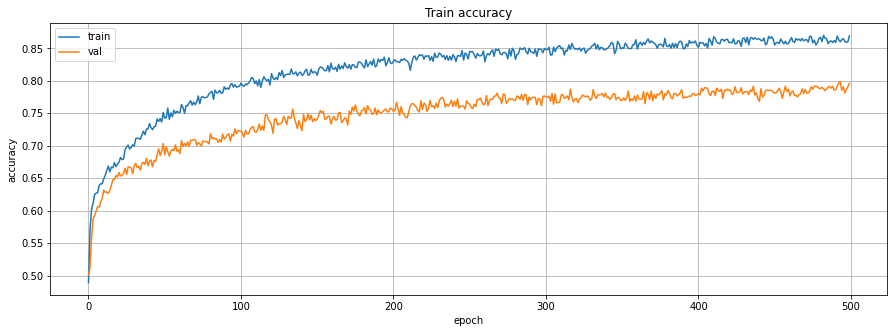

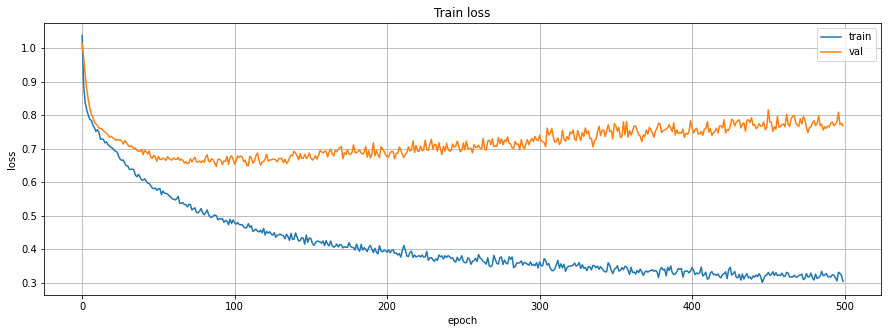

In [40]:
# Summarize history for accuracy
plt.figure(figsize=(15,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

# Summarize history for loss
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.grid()
plt.show()

In [41]:
#Evaluate Model with test set
results = model.evaluate(x_test, y_test, batch_size=128)
print( f"{model.metrics_names} = {results}" )

14/14 [==============================] - 0s 3ms/step - loss: 0.8547 - acc: 0.7963
['loss', 'acc'] = [0.8546829223632812, 0.7962962985038757]


#Inference

In [42]:
# Test using the model on x_test[i]
i = 0
y_pred = model.predict( x_test[i].reshape(1,-1) )   # reshape x_test[i] from (n_feature,) to (1, n_feature)

print( f"{'#'*10} Input: x_testdp[{i}] {'#'*10}" )
print( f"shape={x_test[i].shape}\nvalue={x_test[i]}\n" )

print( f"{'#'*10} Ground truth: y_test[{i}] {'#'*10}" )
# print( f"shape={y_test[i].shape}\nvalue={y_test[i]}\n" )

print( f"{'#'*10} Prediction: y_pred {'#'*10}" )
print( f"type={type(y_pred)}\ndtype={y_pred.dtype}\nshape={y_pred.shape}" )
print( f"value={y_pred}" )
print( f"np.argmax(y_pred)={np.argmax(y_pred)}" )

########## Input: x_testdp[0] ##########
shape=(12,)
value=[-0.5690112  -0.67430776 -0.34701508 -0.5588265   0.7333047  -0.7059815
  0.12047138  1.0613587   0.45612654  1.0199099   0.24211639 -0.7452494 ]

########## Ground truth: y_test[0] ##########
########## Prediction: y_pred ##########
type=<class 'numpy.ndarray'>
dtype=float32
shape=(1, 3)
value=[[2.3853287e-04 8.4344184e-01 1.5631960e-01]]
np.argmax(y_pred)=1
